In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('kyphosis.csv')

In [4]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


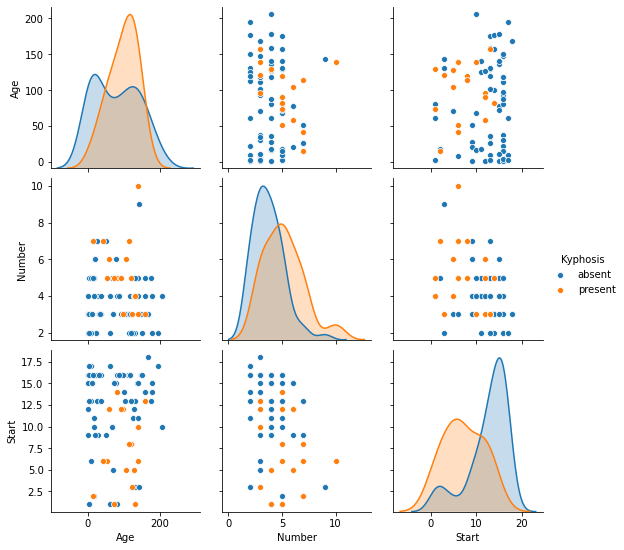

In [8]:
sns.pairplot(data,hue='Kyphosis')

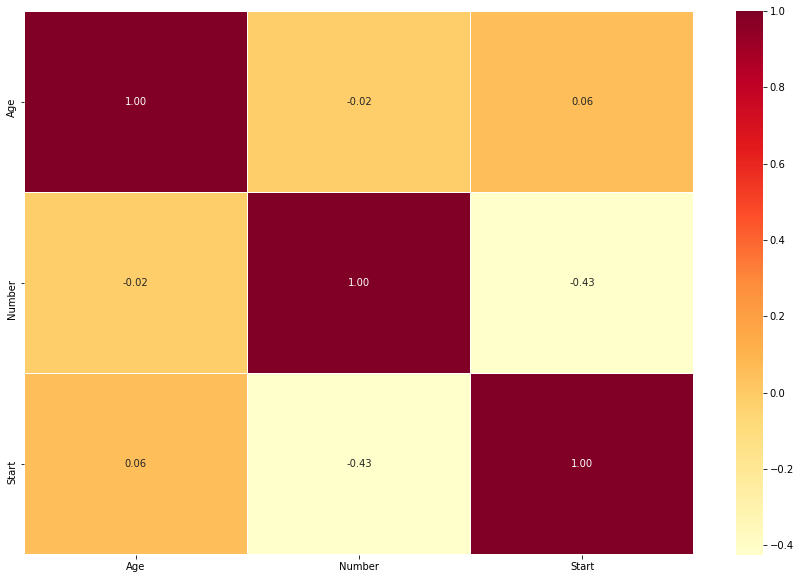

In [21]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlOrRd")

In [12]:
from sklearn.model_selection import train_test_split
x = data.drop('Kyphosis',axis=1)
y = data['Kyphosis']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
preds = model.predict(x_test)

In [22]:
model.score(x_train,y_train)

1.0

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,preds))

[[10  4]
 [ 2  1]]


In [17]:
print("The error rate is {}%".format((6/len(preds)*100)))

The error rate is 35.294117647058826%


In [18]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
preds2 = model2.predict(x_test)

In [23]:
model2.score(x_train,y_train)

1.0

In [19]:
print(confusion_matrix(y_test,preds2))

[[14  0]
 [ 3  0]]


In [20]:
print("The error rate is {}%".format((3/len(preds2)*100)))

The error rate is 17.647058823529413%
